In [212]:
#Wrangling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#training and testing
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**First we check datasets dimension and information**

In [213]:
#import dataset
train_raw = pd.read_csv('../input/train.csv')
test_raw = pd.read_csv('../input/test.csv')

In [214]:
#check column names
train_raw.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [215]:
#dataset dimension
train_raw.shape

(891, 12)

In [216]:
#datasets information
print(train_raw.info())
print('_'*40)
print(test_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

**Clean Datasets**
1. Fill in Missing Values
2. Remove Outliers

In [217]:
#check Missing Values
print(train_raw.isnull().sum())
print('_'*40)
print(test_raw.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [218]:
#Fill in missing values expect cabin column 
train_raw['Age'] = train_raw.Age.fillna(train_raw.Age.mean())
test_raw['Age'] = test_raw.Age.fillna(test_raw.Age.mean())
train_raw['Embarked'] = train_raw.Embarked.fillna(train_raw.Embarked.mode()[0])
test_raw['Embarked'] = test_raw.Embarked.fillna(test_raw.Embarked.mode()[0])
test_raw['Fare'] = test_raw.Fare.fillna(test_raw.Fare.mean())
print(train_raw.isnull().sum())
print('_'*40)
print(test_raw.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


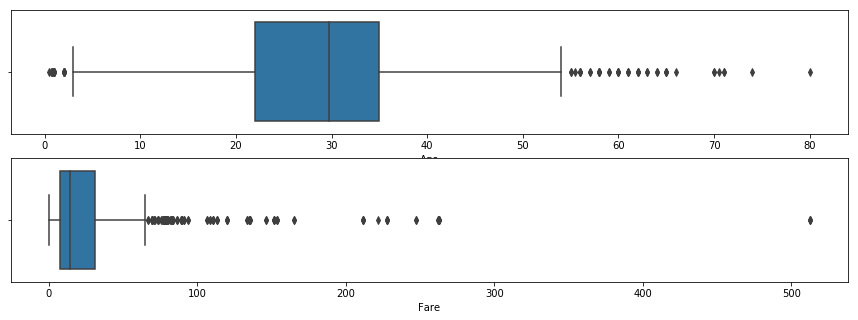

In [219]:
#Check outliers for continuous variables 
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
sns.boxplot(x = 'Age', data = train_raw)
plt.subplot(2,1,2)
sns.boxplot(x = 'Fare', data = train_raw)

**Now we analyse distributions of data  **

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0%: 0.42
25%: 22.0
50%: 29.69911764705882
75%: 35.0
100%: 80.0


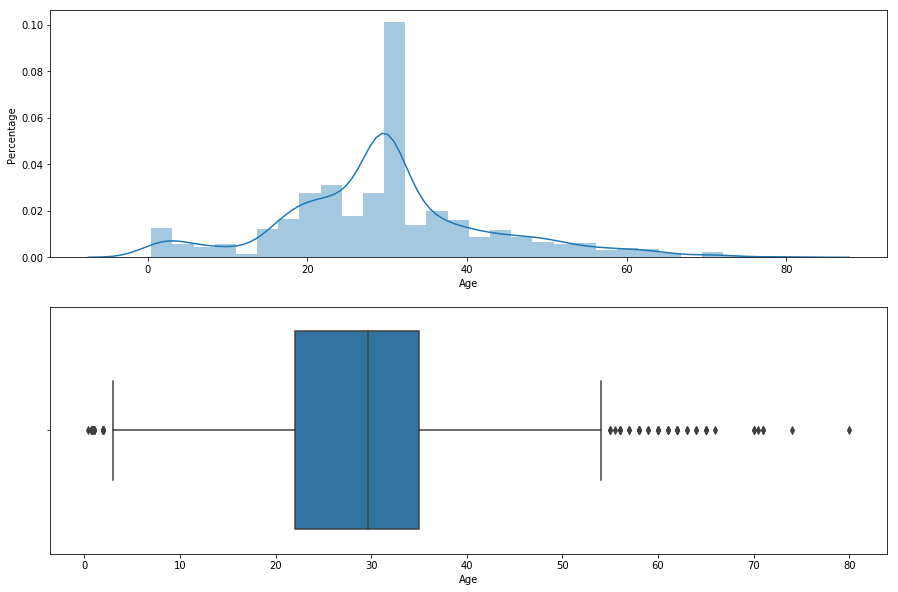

In [220]:
#Age Analysis
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
ax1 = sns.distplot(train_raw.Age)
ax1.set(xlabel = "Age", ylabel = "Percentage")
plt.subplot(2,1,2)
ax2 = sns.boxplot(train_raw.Age)
for i in np.arange(0,1.25,0.25):
    print("{0:.0f}%:".format(i * 100),train_raw['Age'].quantile(i))

0%: 0.0
25%: 7.9104
50%: 14.4542
75%: 31.0
100%: 512.3292


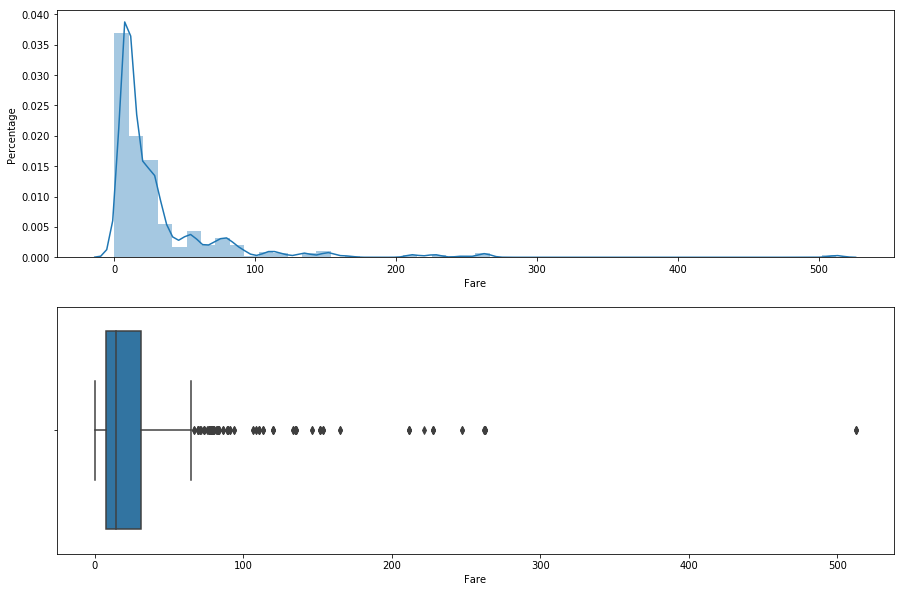

In [221]:
#Fare Analysis
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
ax1 = sns.distplot(train_raw.Fare)
ax1.set(xlabel = "Fare", ylabel = "Percentage")
plt.subplot(2,1,2)
ax2 = sns.boxplot(train_raw.Fare)
for i in np.arange(0,1.25,0.25):
    print("{0:.0f}%:".format(i * 100), train_raw['Fare'].quantile(i))

**Survival Rate Analysis**

In [222]:
train = train_raw.copy()

In [223]:
#Total Survival Rate
train.Survived.mean()

0.3838383838383838

In [224]:
#Sex classes and survival rate for each class
print(train.groupby('Sex').size())
print('_'*40)
print(train.groupby('Sex').mean()['Survived'].sort_values(ascending = False))

Sex
female    314
male      577
dtype: int64
________________________________________
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [225]:
#Partition Age
age_partition_size = pd.DataFrame()
age_partition = pd.DataFrame(train[['Survived','Age']])
age_partition['Partition'] = pd.cut(train['Age'], [0,10,20,30,40,50,60,70,80])

age_partition_size['Survived'] = age_partition.groupby('Partition').mean()['Survived']
age_partition_size['Size'] = age_partition.groupby('Partition').size()
age_partition_size

,Survived,Size
Partition,,
"(0, 10]",0.593750,64
"(10, 20]",0.382609,115
"(20, 30]",0.334152,407
"(30, 40]",0.445161,155
"(40, 50]",0.383721,86
"(50, 60]",0.404762,42
"(60, 70]",0.235294,17
"(70, 80]",0.200000,5


In [226]:
#Embarked classes and survival rate for each class
print(train.groupby('Embarked').size())
print('_'*40)
print(train.groupby('Embarked').mean()['Survived'].sort_values(ascending = False))

Embarked
C    168
Q     77
S    646
dtype: int64
________________________________________
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [227]:
#SibSp classes and survival rate for each class
print(train.groupby('SibSp').size())
print('_'*40)
print(train.groupby('SibSp').mean()['Survived'].sort_values(ascending = False))

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64
________________________________________
SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64


In [228]:
#Parch classes and survival rate for each class
print(train.groupby('Parch').size())
print('_'*40)
print(train.groupby('Parch').mean()['Survived'].sort_values(ascending = False))

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
________________________________________
Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64


**Analysing Correlations**

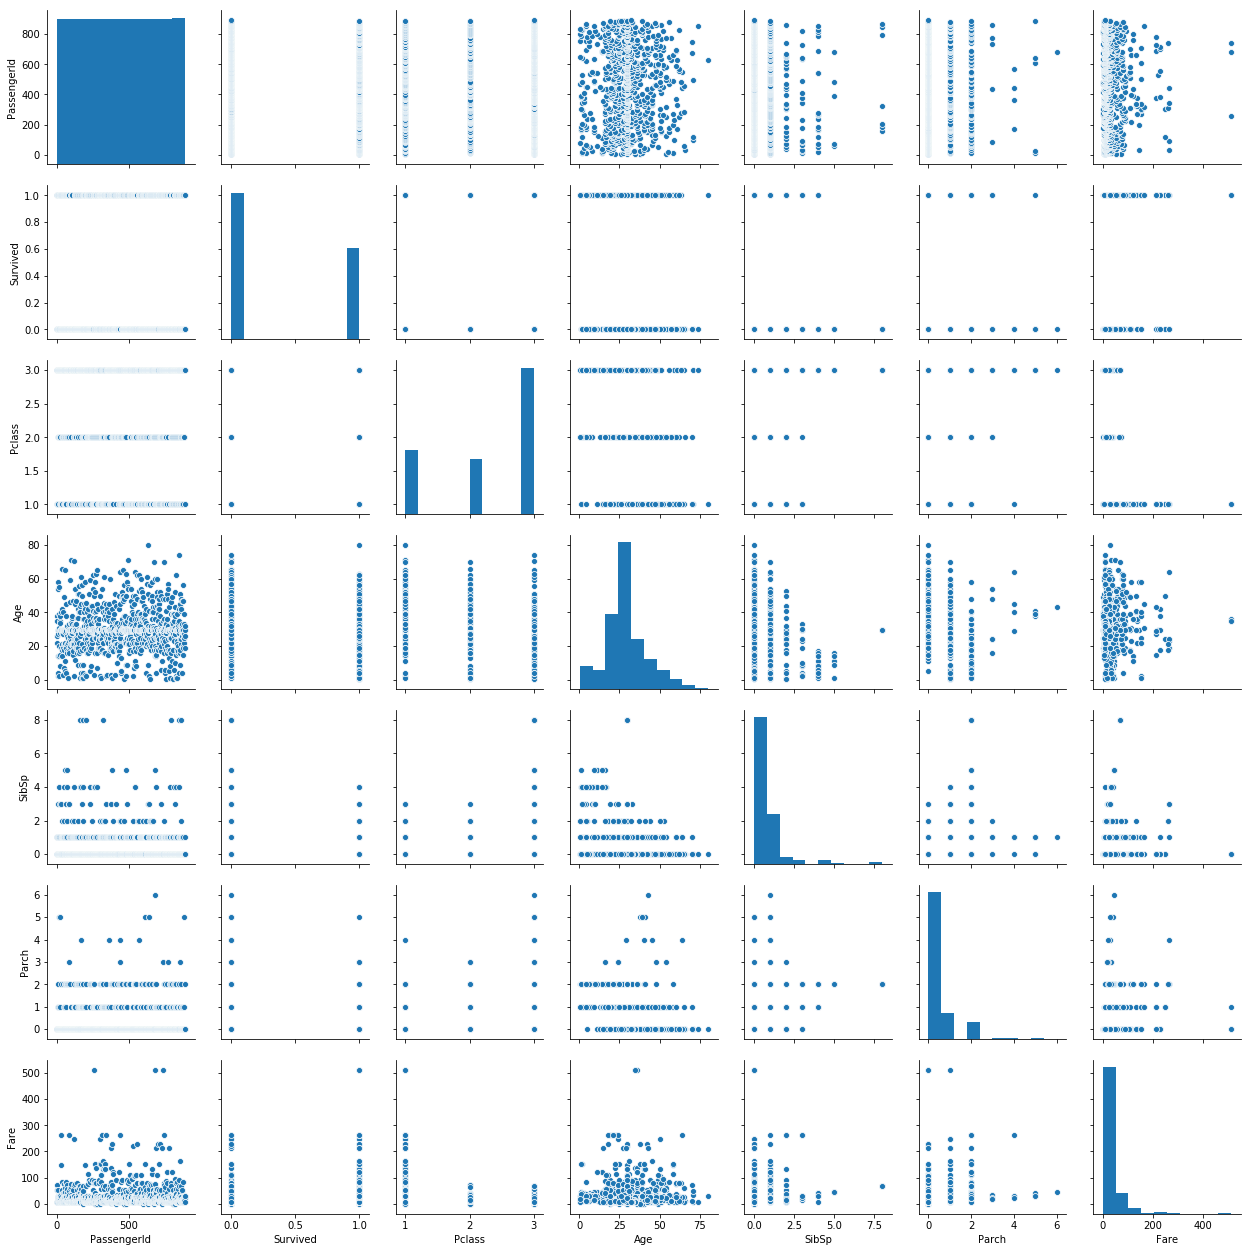

In [229]:
#correlation
sns.pairplot(train)

**Classifing and Testing using ML models **

In [230]:
#Drop columns
train_Predict = train.copy()
label = train_Predict.Survived
train_Predict = train_Predict.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)

In [231]:
#One hot encoding 
def sex_binary(sex):
    if sex == "male": 
        return 0
    else:
        return 1
    
def embarked_class(embarked):
    if embarked == 'S':
        return 0
    elif embarked == 'C':
        return 1
    elif embarked == 'Q':
        return 2

In [232]:
train_Predict['Age'] = age_partition['Partition']
train_Predict['Sex'] = train['Sex'].apply(sex_binary)
train_Predict['Embarked'] = train['Embarked'].apply(embarked_class)
train_Predict['Age'] = age_partition['Partition'].apply(lambda x: x.mid)

In [233]:
#training set 
train_Predict.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,0,25.0,0,0,13.00,0
887,1,1,15.0,0,0,30.00,0
888,3,1,25.0,1,2,23.45,0
889,1,0,25.0,0,0,30.00,1
890,3,0,35.0,0,0,7.75,2


In [234]:
#Decision Tree Classifier
clf = DecisionTreeClassifier()
x_train, y_train, x_test, y_test = train_test_split(train_Predict, label, train_size = 0.8, random_state = 0)
clf.fit(x_train, x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [235]:
#Moment of Truth
y_pred = clf.predict(y_train)
accuracy_score(y_test, y_pred)

0.8379888268156425

In [236]:
#Random Forest Classifier
clf = RandomForestClassifier()
x_train, y_train, x_test, y_test = train_test_split(train_Predict, label, train_size = 0.8, random_state = 0)
clf.fit(x_train, x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [237]:
#Moment of Truth
y_pred = clf.predict(y_train)
accuracy_score(y_test, y_pred)

0.8547486033519553